In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

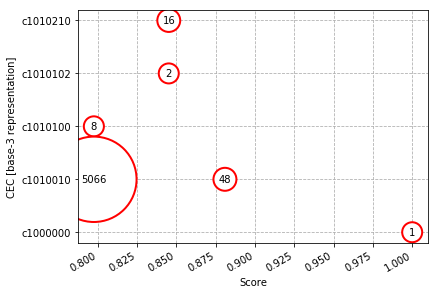

In [3]:
# src: https://stackoverflow.com/questions/51272304/how-to-create-a-categorical-bubble-plot-in-python

# load title
title = ""
with open('plotBestNFreq.csv') as f:
    title = f.readline()

# load data
df = pd.read_csv('plotBestNFreq.csv', skiprows = 1)

#create padding column from values for circles that are neither too small nor too large
df["padd"] = 2.5 * (df.freq - df.freq.min()) / (df.freq.max() - df.freq.min()) + 0.5
fig = plt.figure()

s = plt.scatter(df.score, df.base3, s = 0)
s.remove
#plot data row-wise as text with circle radius according to Count
for row in df.itertuples():
    bbox_props = dict(boxstyle = "circle, pad = {}".format(row.padd), fc = "w", ec = "r", lw = 2)
    plt.annotate(str(row.freq), xy = (row.score, row.base3), bbox = bbox_props, ha="center", va="center", zorder = 2, clip_on = True)

#plot grid behind markers
plt.grid(ls = "--", zorder = 1)
#take care of long labels
fig.autofmt_xdate()
plt.tight_layout()

plt.xlabel("Score")
plt.ylabel("CEC [base-3 representation]")
#plt.title("Phrase: "+title)
plt.show()
